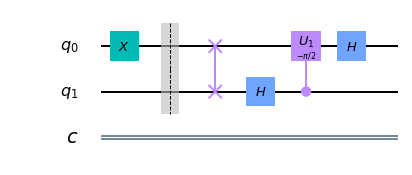

In [20]:
### code specific initialization (importing libraries)
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from math import *
import scipy
from qiskit.tools.visualization import plot_bloch_multivector

# importing Qiskit
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.tools.visualization import plot_histogram

from qiskit.quantum_info.synthesis import euler_angles_1q 
from scipy.linalg import sqrtm
from cmath import exp
from math import cos, sin

### problem specific parameters

# matrix representation of linear equation
A = 0.5*np.array([[3,1],[1,3]])
t0 = 2*pi #time paramter appearing in the unitary
r = 4

################3 checking quantum fourier transform
q = QuantumRegister(2, 'q')
c = ClassicalRegister(1, 'c')

qpe = QuantumCircuit(q,c)
# quantum fourier transform
qpe.x(q[0])
qpe.barrier()
qpe.swap(q[0],q[1])
qpe.h(q[1])
qpe.cu1(-pi/2,q[1],q[0])
qpe.h(q[0])
#qpe.swap(q[0],q[1])

qpe.draw(output="mpl")

[ 0.5+0.j  0.5+0.j -0.5+0.j -0.5+0.j]


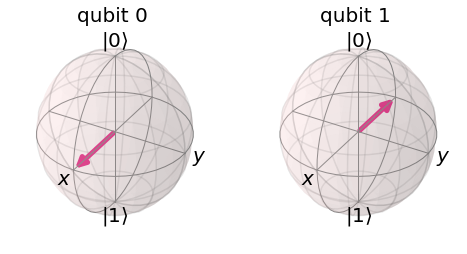

In [21]:
circuit = qpe
simulator = BasicAer.get_backend('statevector_simulator')
result = execute(circuit, backend = simulator).result()
statevector = result.get_statevector()
print(statevector)

plot_bloch_multivector(statevector)